## Beta


$Beta = \frac{Covariance}{Variance}$

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib notebook

In [12]:
# -m signifies monthly data
sp500 = pd.read_csv("sp500-m.csv", index_col=0, parse_dates=True)
aapl = pd.read_csv("aapl-m.csv", index_col=0, parse_dates=True)

In [13]:
# assign columns and read the tickers
ticker = 'AAPL'
col = 'Adj Close'

data = pd.concat([sp500['Adj Close'], aapl['Adj Close']], axis = 1)
data.columns = ['SP500', ticker]

In [14]:
data.tail()

,SP500,AAPL
Date,,
2020-08-01,3500.310059,128.585907
2020-09-01,3363.000000,115.610542
2020-10-01,3269.959961,108.672516
2020-11-01,3621.629883,118.844963
2020-12-01,3756.070068,132.690002


In [15]:
data = np.log(data/data.shift())

In [16]:
data.tail()

,SP500,AAPL
Date,,
2020-08-01,0.067719,0.194233
2020-09-01,-0.040018,-0.106370
2020-10-01,-0.028056,-0.061888
2020-11-01,0.102146,0.089481
2020-12-01,0.036449,0.110196


In [17]:
# find covariance of row 0 and column 1
cov = data.cov().iloc[0,1]

In [18]:
cov

0.0024656309886439735

In [19]:
var = data['SP500'].var()

In [20]:
beta = cov/var

In [21]:
beta

1.278325353122166

<IPython.core.display.Javascript object>


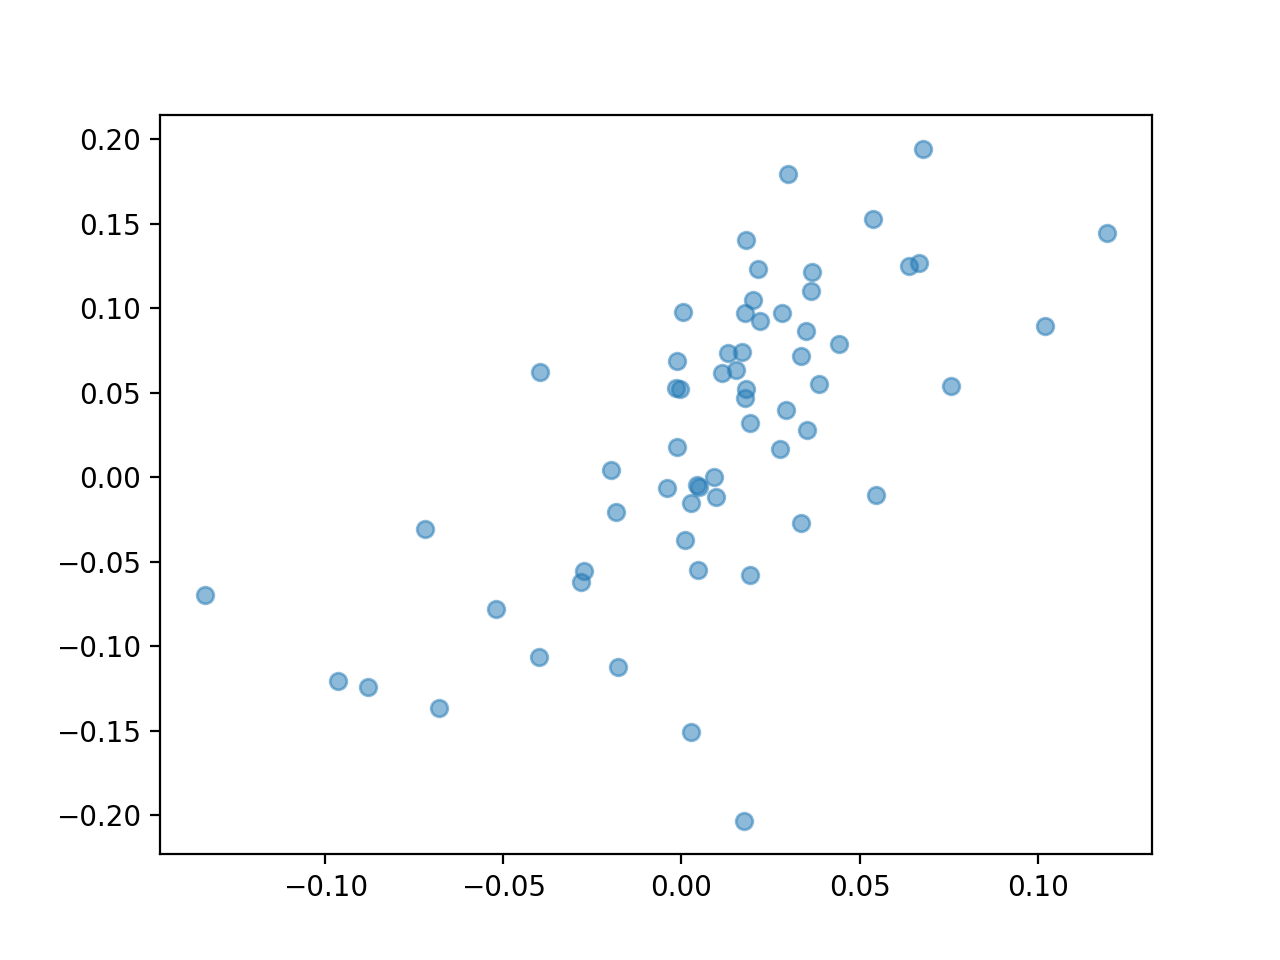

In [22]:
fig, ax = plt.subplots()
ax.scatter(data['SP500'], data['AAPL'], alpha = 0.5)

In [23]:
X = data['SP500'].iloc[1:].values.reshape(-1,1)
Y = data['AAPL'].iloc[1:].values.reshape(-1,1)

lin_regressor = LinearRegression()
lin_regressor.fit(X, Y)
beta = lin_regressor.coef_

In [24]:
print(beta)

[[1.27832535]]
